# 1083 Albumin Initial ML

### By: Ian Weimer

## Imports

In [17]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from scipy import stats
import math
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from statsmodels.regression.linear_model import OLS
from sklearn.model_selection import cross_val_score
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_curve, auc, confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import auc, plot_precision_recall_curve
import warnings
from sklearn.compose import make_column_transformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import balanced_accuracy_score
pd.set_option('display.max_columns', None)

## Load Albumin Data From Pre-processing and Exploratory Analysis

In [18]:
df = pd.read_csv('/Users/ianweimer/1083-albumin-data-exploration/ML/tables/albumin_new_1.csv')

In [19]:
# drop insignificant vars

#df.drop(columns = ['bed_size', 'Cirrhosis', 'tenant'], inplace=True)

In [20]:
df.head()

sex  ICU  mass_transfusion  total_transfusions  anemia_status  CCI  \
0    1    1                 0                   1            2.0    6   
1    1    0                 0                   0            3.0    2   
2    1    0                 0                   0            2.0    3   
3    1    1                 0                   1            1.0    1   
4    1    0                 0                   0            2.0   10   

   normal_albumin_achieved  albumin_24hrs  5_percent_albumin  \
0                      1.0            0.0                0.0   
1                      0.0            0.0                0.0   
2                      1.0            0.0                0.0   
3                      0.0            0.0                1.0   
4                      1.0            0.0                0.0   

   25_percent_albumin  unknown_albumin_type  MELD  qSOFA  Cirrhosis  \
0                 0.0                   1.0  11.0      1          0   
1                 1.0                   0.0   9.0      0          1   
2                 1.0                   0.0  18.0      3          0   
3                 1.0                   1.0   7.0      2          0   
4                 1.0                   0.0  11.0      0          0   

   beta_blocker  hemorrhagic  alb_diff  cluster         x         y  LOS_days  \
0             1            0       0.3        0 -2.478439  1.923821         2   
1             0            0       0.3        0 -4.813019 -1.824403         1   
2             1            0       2.0        1  4.318151 -1.696408         2   
3             1            0       0.5        0 -6.879214 -2.710250         2   
4             0            0       1.5        0 -2.120203  5.899759         2   

   30_day_mortality  30_day_readmission  days_until_readmission  \
0                 0                   0                       2   
1                 0                   0                       2   
2                 0                   0                       2   
3                 0                   0                       2   
4                 0                   0                       1   

   total_ICU_LOS_days  
0                   2  
1                   0  
2                   0  
3                   2  
4                   0

In [21]:
df.shape

(7846, 25)

In [23]:
df.drop(columns=['cluster', 'x', 'y', 'sex', 'ICU', \
                 'CCI', 'alb_diff'], inplace=True)

In [24]:
df = df.drop(columns=['30_day_readmission', '30_day_mortality', 'days_until_readmission', 'LOS_days'])

In [25]:
df.describe()

mass_transfusion  total_transfusions  anemia_status  \
count       7846.000000         7846.000000    7846.000000   
mean           0.028677            0.944430       2.090874   
std            0.166908            1.438511       0.923885   
min            0.000000            0.000000       0.000000   
25%            0.000000            0.000000       2.000000   
50%            0.000000            0.000000       2.000000   
75%            0.000000            1.000000       3.000000   
max            1.000000            9.000000       3.000000   

       normal_albumin_achieved  albumin_24hrs  5_percent_albumin  \
count              7846.000000    7846.000000        7846.000000   
mean                  0.038618       0.080423           0.058246   
std                   0.192696       0.271965           0.234223   
min                   0.000000       0.000000           0.000000   
25%                   0.000000       0.000000           0.000000   
50%                   0.000000       0.000000           0.000000   
75%                   0.000000       0.000000           0.000000   
max                   1.000000       1.000000           1.000000   

       25_percent_albumin  unknown_albumin_type         MELD        qSOFA  \
count         7846.000000           7846.000000  7846.000000  7846.000000   
mean             0.115218              0.109865    13.628211     0.557482   
std              0.319305              0.312741     7.247358     0.713484   
min              0.000000              0.000000     6.000000     0.000000   
25%              0.000000              0.000000     8.000000     0.000000   
50%              0.000000              0.000000    11.000000     0.000000   
75%              0.000000              0.000000    17.000000     1.000000   
max              1.000000              1.000000    40.000000     3.000000   

         Cirrhosis  beta_blocker  hemorrhagic  total_ICU_LOS_days  
count  7846.000000   7846.000000  7846.000000         7846.000000  
mean      0.349350      0.388733     0.088453            0.440989  
std       0.476795      0.487494     0.283970            0.789848  
min       0.000000      0.000000     0.000000            0.000000  
25%       0.000000      0.000000     0.000000            0.000000  
50%       0.000000      0.000000     0.000000            0.000000  
75%       1.000000      1.000000     0.000000            1.000000  
max       1.000000      1.000000     1.000000            2.000000

## Modeling

In [26]:
# establish target feature, LOS_days, as y feature
y = df['total_ICU_LOS_days']
# drop target feature from features dataframe
X = df.drop(columns = ['total_ICU_LOS_days'], axis = 1)
# save dataframe column titles to list for reassigning after min max scale 
cols = X.columns

In [27]:
cols

Index(['mass_transfusion', 'total_transfusions', 'anemia_status',
       'normal_albumin_achieved', 'albumin_24hrs', '5_percent_albumin',
       '25_percent_albumin', 'unknown_albumin_type', 'MELD', 'qSOFA',
       'Cirrhosis', 'beta_blocker', 'hemorrhagic'],
      dtype='object')

## Standardize Data

In [28]:
#cols = X.columns

#instantiate min-max scaling object
#mm = MinMaxScaler()
# fit and transform feature dataframe
#X = pd.DataFrame(mm.fit_transform(X))
# reassign column names so new dataframe has corresponding names
#X.columns = cols

In [29]:
X.head()

mass_transfusion  total_transfusions  anemia_status  \
0                 0                   1            2.0   
1                 0                   0            3.0   
2                 0                   0            2.0   
3                 0                   1            1.0   
4                 0                   0            2.0   

   normal_albumin_achieved  albumin_24hrs  5_percent_albumin  \
0                      1.0            0.0                0.0   
1                      0.0            0.0                0.0   
2                      1.0            0.0                0.0   
3                      0.0            0.0                1.0   
4                      1.0            0.0                0.0   

   25_percent_albumin  unknown_albumin_type  MELD  qSOFA  Cirrhosis  \
0                 0.0                   1.0  11.0      1          0   
1                 1.0                   0.0   9.0      0          1   
2                 1.0                   0.0  18.0      3          0   
3                 1.0                   1.0   7.0      2          0   
4                 1.0                   0.0  11.0      0          0   

   beta_blocker  hemorrhagic  
0             1            0  
1             0            0  
2             1            0  
3             1            0  
4             0            0

## Train Test Split

In [30]:
# train test split from target feature series and the predicting feature dataframe (set test size to 20% of data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 33)

## Multinomial Logistic Regression

In [31]:
# instantiate a Logistic Regression model without an intercept, 'liblinear' solver method
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
# fit the model to X and y training sets
logreg.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(multi_class='multinomial')

Feature: mass_transfusion Score: -0.07599
Feature: total_transfusions Score: -0.07795
Feature: anemia_status Score: -0.07377
Feature: normal_albumin_achieved Score: -0.18709
Feature: albumin_24hrs Score: -0.13237
Feature: 5_percent_albumin Score: -0.05436
Feature: 25_percent_albumin Score: -0.06999
Feature: unknown_albumin_type Score: -0.02417
Feature: MELD Score: 0.00271
Feature: qSOFA Score: -0.15404
Feature: Cirrhosis Score: -0.06830
Feature: beta_blocker Score: 0.08178
Feature: hemorrhagic Score: -0.26959


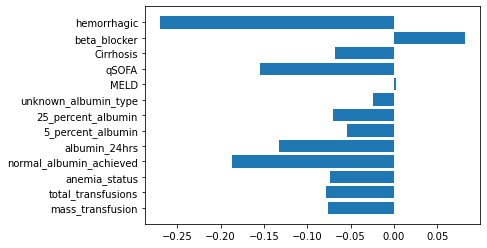

In [32]:
# general quick feature importance
# get coefficients for importance
# coefficients represent the log odds that an observation is in the
# target class, given the values of its X variables

importance = logreg.coef_[0]
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()

                         Importance
beta_blocker               1.085221
MELD                       1.002717
unknown_albumin_type       0.976116
5_percent_albumin          0.947089
Cirrhosis                  0.933981
25_percent_albumin         0.932400
anemia_status              0.928884
mass_transfusion           0.926826
total_transfusions         0.925008
albumin_24hrs              0.876013
qSOFA                      0.857241
normal_albumin_achieved    0.829367
hemorrhagic                0.763692


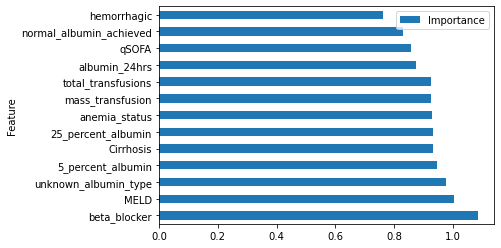

In [33]:
# convert log odds into regular odds with exponentiation
# np.exp()
# and list values, visualize in bar plot

odds = np.exp(logreg.coef_[0])
feature_importance = \
            pd.DataFrame(odds, 
             X.columns, 
             columns=['Importance'])\
            .sort_values(by='Importance', ascending=False)
        
ax = feature_importance.plot.barh(xlabel='Feature', ylabel='Importance')
print(feature_importance)
plt.show()

In [34]:
# Generate model prediction data for train and test sets
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

In [35]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[4674    0   41]
 [ 388    0    4]
 [1116    0   53]]


In [36]:
# model metrics for training set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.76      0.99      0.86      4715
           1       0.00      0.00      0.00       392
           2       0.54      0.05      0.08      1169

    accuracy                           0.75      6276
   macro avg       0.43      0.35      0.31      6276
weighted avg       0.67      0.75      0.66      6276



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[1141    0   10]
 [ 107    0    1]
 [ 294    0   17]]


In [38]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.74      0.99      0.85      1151
           1       0.00      0.00      0.00       108
           2       0.61      0.05      0.10       311

    accuracy                           0.74      1570
   macro avg       0.45      0.35      0.32      1570
weighted avg       0.66      0.74      0.64      1570



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Decision Tree with all (16) independent vars

In [39]:
# instantiate a decision tree model
# max_depth limits depth of tree, helps prevent overfitting training data
dt = tree.DecisionTreeClassifier(max_depth=5)
# fit the model to X and y training sets
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

Feature: mass_transfusion Score: 0.01371
Feature: total_transfusions Score: 0.19727
Feature: anemia_status Score: 0.02569
Feature: normal_albumin_achieved Score: 0.01079
Feature: albumin_24hrs Score: 0.00000
Feature: 5_percent_albumin Score: 0.01114
Feature: 25_percent_albumin Score: 0.05769
Feature: unknown_albumin_type Score: 0.18211
Feature: MELD Score: 0.08394
Feature: qSOFA Score: 0.25786
Feature: Cirrhosis Score: 0.00693
Feature: beta_blocker Score: 0.02531
Feature: hemorrhagic Score: 0.12756


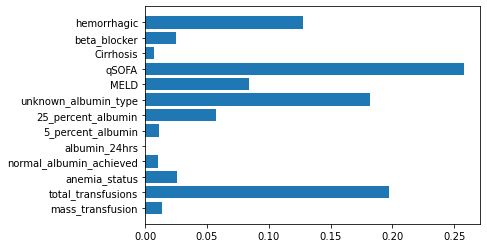

In [40]:
# get importance from decision tree model
importance = dt.feature_importances_
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()

In [41]:
# generate model prediction data for train and test sets
y_hat_train = dt.predict(X_train)
y_hat_test = dt.predict(X_test)

In [42]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[4660    0   55]
 [ 381    2    9]
 [1064    0  105]]


In [43]:
# model metrics for train set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.76      0.99      0.86      4715
           1       1.00      0.01      0.01       392
           2       0.62      0.09      0.16      1169

    accuracy                           0.76      6276
   macro avg       0.79      0.36      0.34      6276
weighted avg       0.75      0.76      0.68      6276



In [44]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[1132    0   19]
 [ 107    0    1]
 [ 279    0   32]]


In [45]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.75      0.98      0.85      1151
           1       0.00      0.00      0.00       108
           2       0.62      0.10      0.18       311

    accuracy                           0.74      1570
   macro avg       0.45      0.36      0.34      1570
weighted avg       0.67      0.74      0.66      1570



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


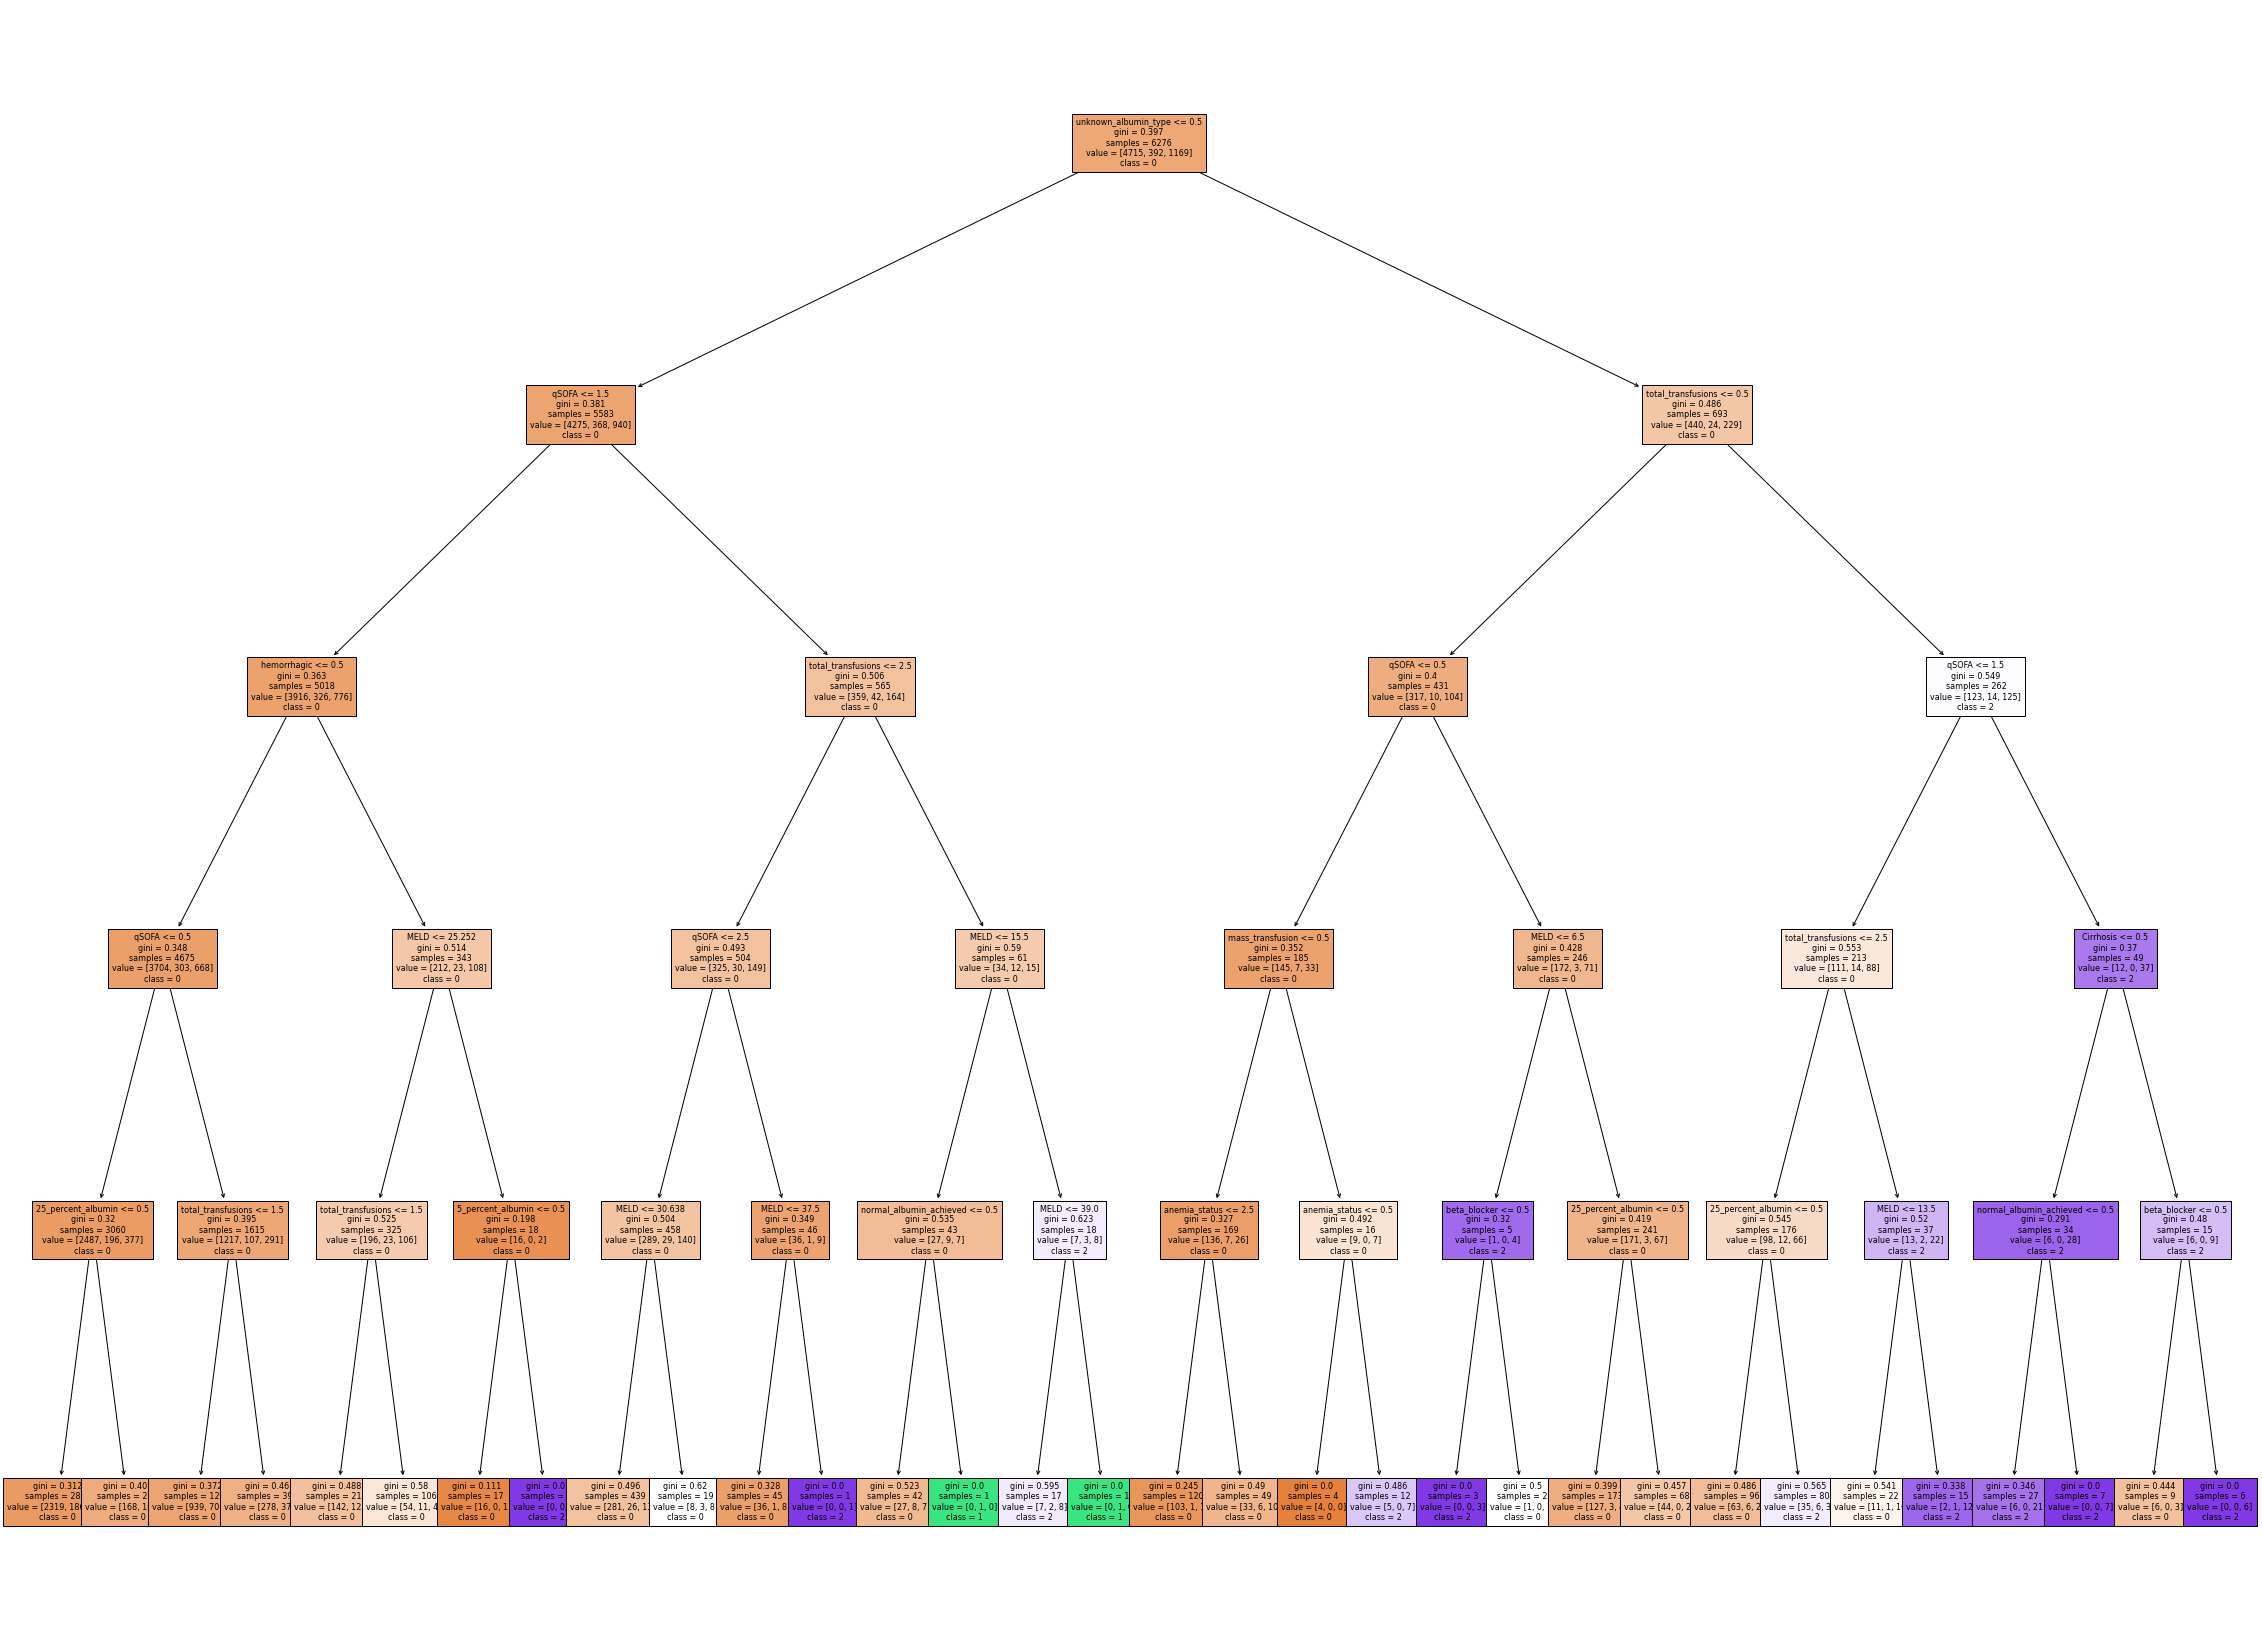

In [46]:
feature_names = df.columns.tolist()
class_names = ['0', '1', '2']

fig = plt.figure(figsize=(40,30))
_ = tree.plot_tree(dt,
                   fontsize=8,
                   feature_names=feature_names,  
                   class_names=class_names,
                   filled=True)

## Decision Tree with 4 selected vars

In [47]:
# instantiate a decision tree model
# max_depth limits depth of tree, helps prevent overfitting training data
dt = tree.DecisionTreeClassifier(max_depth=4)
# fit the model to X and y training sets
X_train1 = X_train[['Cirrhosis', 'qSOFA', 'MELD', 'albumin_24hrs']]
X_test1 = X_test[['Cirrhosis', 'qSOFA', 'MELD', 'albumin_24hrs']]
dt.fit(X_train1, y_train)

DecisionTreeClassifier(max_depth=4)

Feature: Cirrhosis Score: 0.02410
Feature: qSOFA Score: 0.62025
Feature: MELD Score: 0.25165
Feature: albumin_24hrs Score: 0.10400


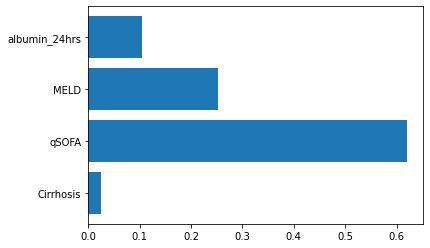

In [48]:
cols = X_train1.columns
# get importance from decision tree model
importance = dt.feature_importances_
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()

In [49]:
# generate model prediction data for train and test sets
y_hat_train = dt.predict(X_train1)
y_hat_test = dt.predict(X_test1)

In [50]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[4704    0   11]
 [ 389    0    3]
 [1155    0   14]]


In [51]:
# model metrics for train set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86      4715
           1       0.00      0.00      0.00       392
           2       0.50      0.01      0.02      1169

    accuracy                           0.75      6276
   macro avg       0.42      0.34      0.29      6276
weighted avg       0.66      0.75      0.65      6276



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[1148    0    3]
 [ 108    0    0]
 [ 309    0    2]]


In [53]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1151
           1       0.00      0.00      0.00       108
           2       0.40      0.01      0.01       311

    accuracy                           0.73      1570
   macro avg       0.38      0.33      0.29      1570
weighted avg       0.62      0.73      0.62      1570



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


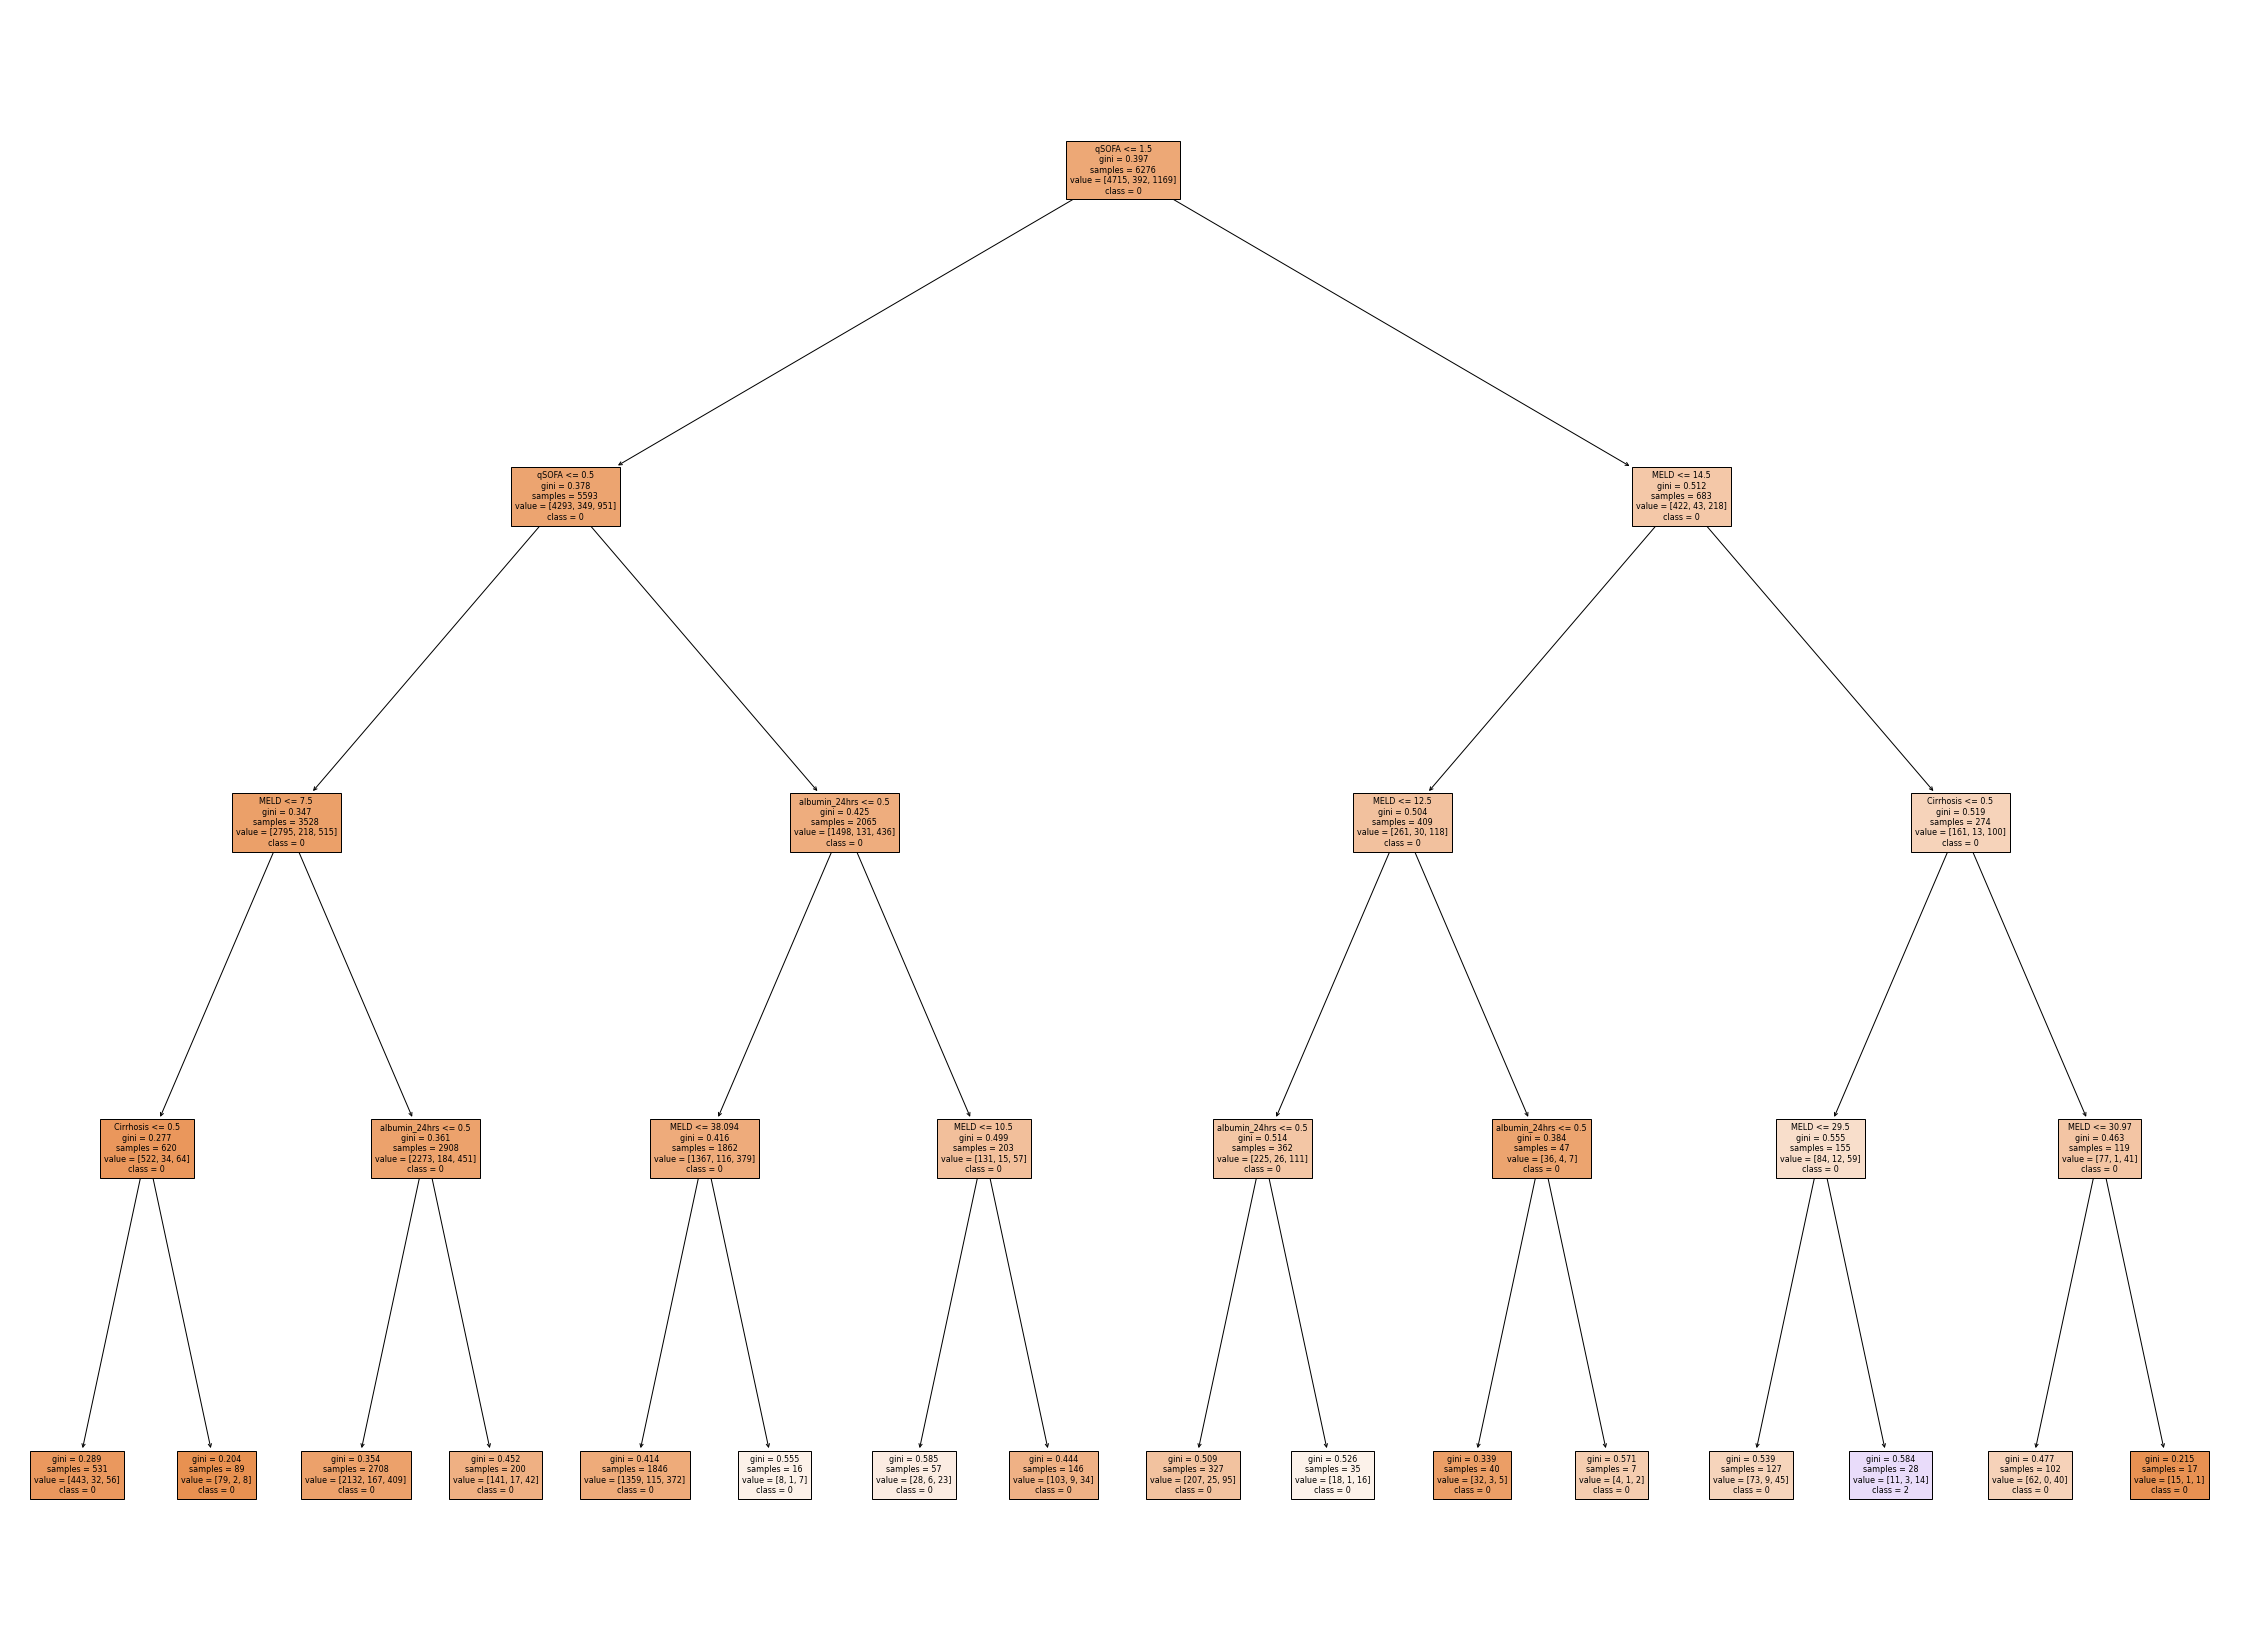

In [54]:
feature_names = X_train1.columns.tolist()
class_names = ['0', '1', '2']

fig = plt.figure(figsize=(40,30))
_ = tree.plot_tree(dt,
                   fontsize=8,
                   feature_names=feature_names,  
                   class_names=class_names,
                   filled=True)